STRESS DETECTION - DIAGNOSTIC VERSION

📁 PART 2: DATA PREPROCESSING
------------------------------------------------------------

1. Loading dataset...
✓ Dataset loaded successfully!
  Shape: 150 rows, 9 columns

2. Dataset Overview:
   user_id  session stress_level  typing_speed_wpm  error_rate_percent  \
0       29        2       medium             56.85                4.74   
1       15        3         high             56.91                7.18   
2        8        1          low             51.34                0.55   
3       21        1          low             45.31                1.16   
4       19        1          low             50.23                1.66   
5       23        3         high             75.66                7.92   
6       11        2       medium             47.33                4.10   
7       11        2       medium             66.06                5.48   
8       24        1          low             50.43                2.47   
9       24        2       

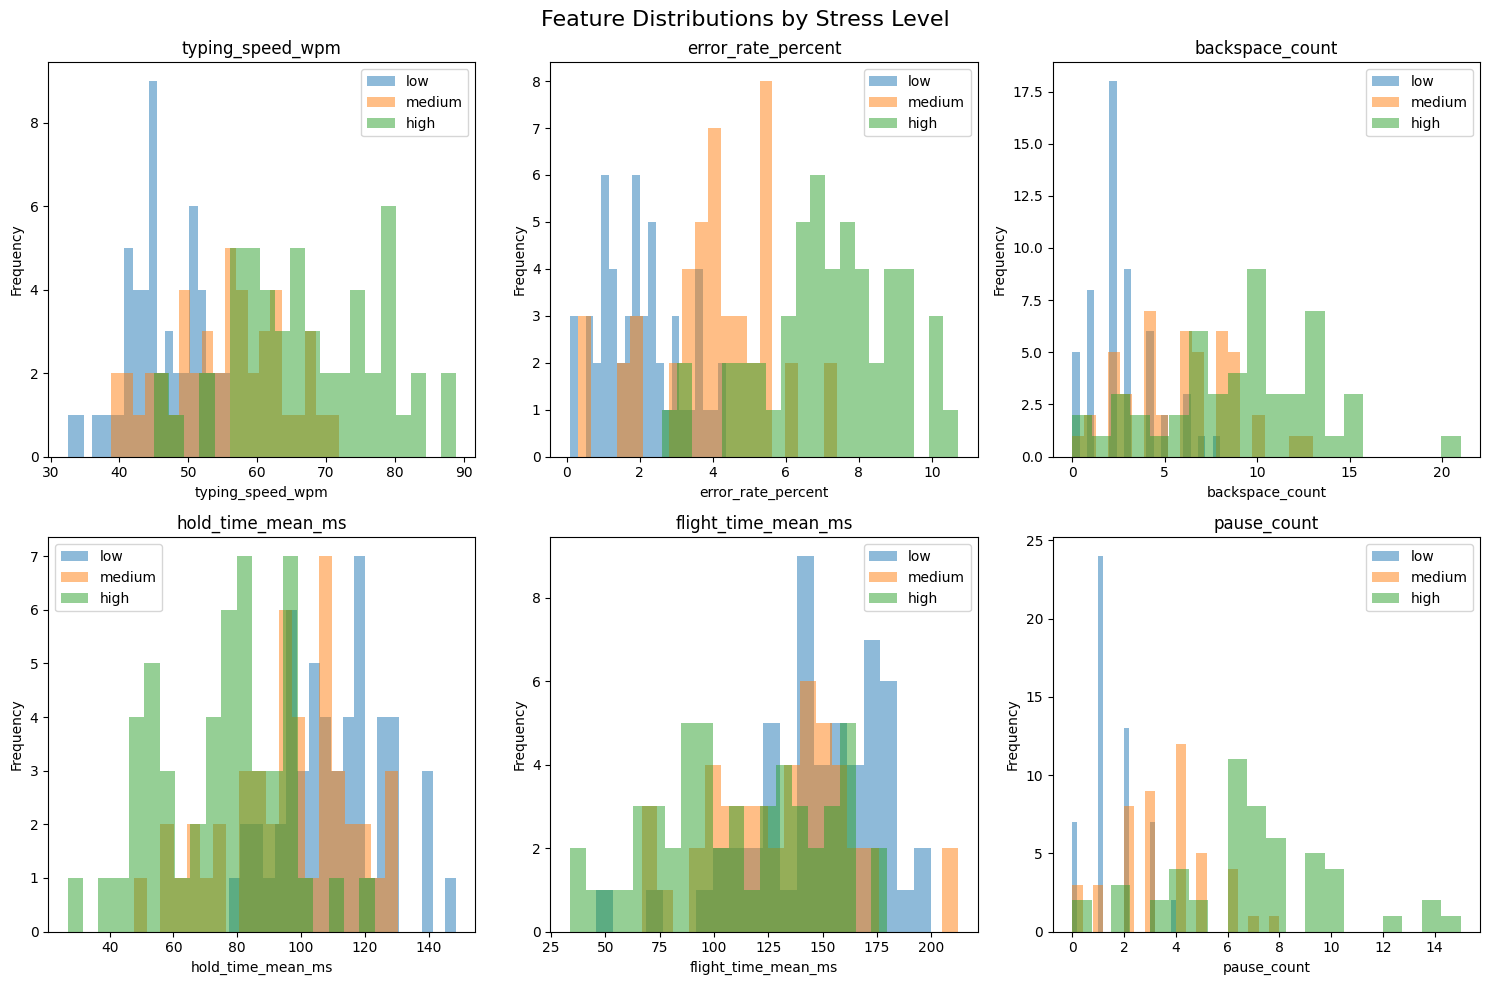


5. Cleaning data...
   Missing values:
stress_level           0
typing_speed_wpm       0
error_rate_percent     0
backspace_count        0
hold_time_mean_ms      0
flight_time_mean_ms    0
pause_count            0
dtype: int64
   Duplicates: 0

6. Separating features and target...
✓ Features: ['typing_speed_wpm', 'error_rate_percent', 'backspace_count', 'hold_time_mean_ms', 'flight_time_mean_ms', 'pause_count']
✓ Features shape: (150, 6)
✓ Target shape: (150,)

7. Encoding stress labels...
✓ Encoding mapping:
   high → 0 (51 samples)
   low → 1 (53 samples)
   medium → 2 (46 samples)

8. Normalizing features...
✓ Features normalized using StandardScaler


🤖 PART 3: MACHINE LEARNING MODEL
------------------------------------------------------------

1. Splitting data (80% train, 20% test)...
✓ Train set: 120 samples
✓ Test set: 30 samples
   Train distribution: [41 42 37]
   Test distribution: [10 11  9]

2. Training models with Cross-Validation...

   Training SVM...
   ✓ SVM:
      T

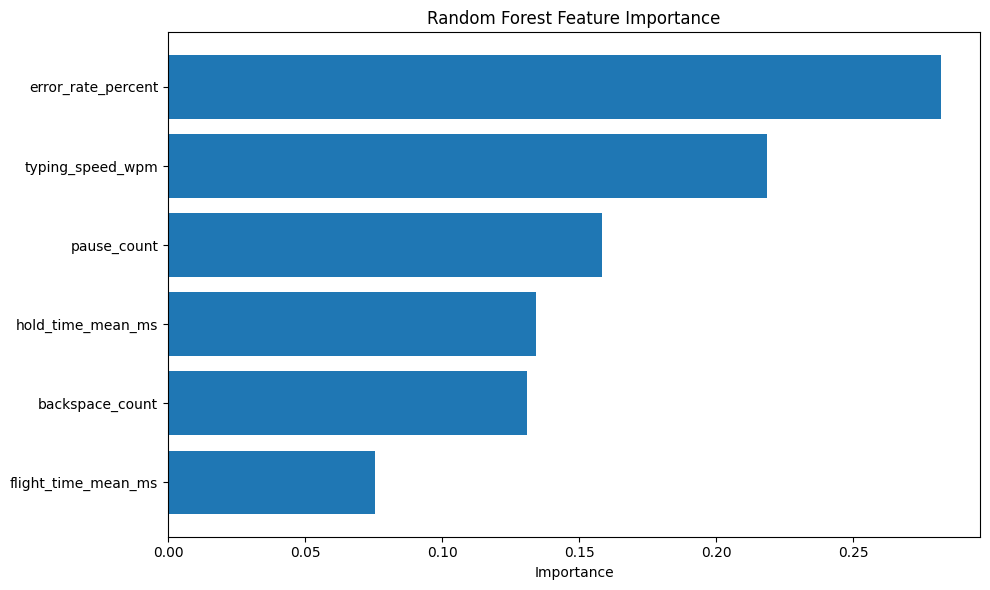


3. Detailed Model Evaluation:

📊 SVM
------------------------------------------------------------
Test Accuracy: 0.9667 (96.67%)

Confusion Matrix:
[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        10
         low       0.92      1.00      0.96        11
      medium       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



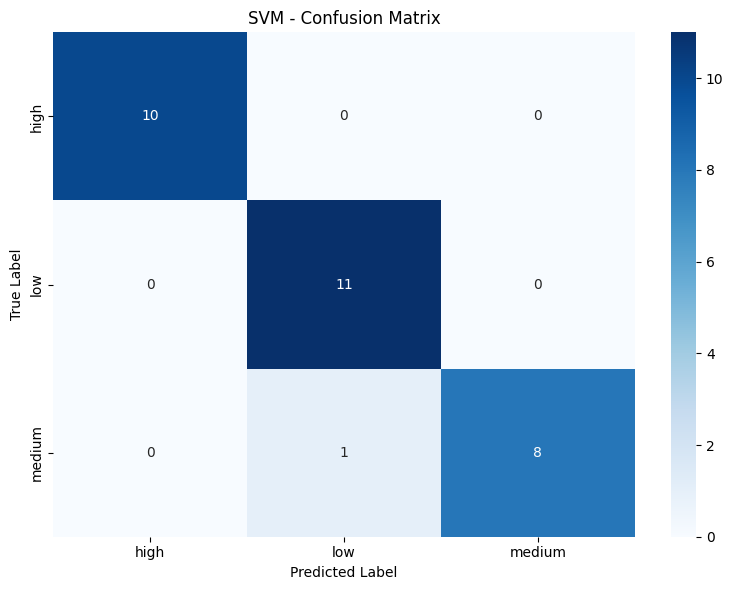


📊 Random Forest
------------------------------------------------------------
Test Accuracy: 0.9333 (93.33%)

Confusion Matrix:
[[ 9  0  1]
 [ 0 11  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.90      0.95        10
         low       0.92      1.00      0.96        11
      medium       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



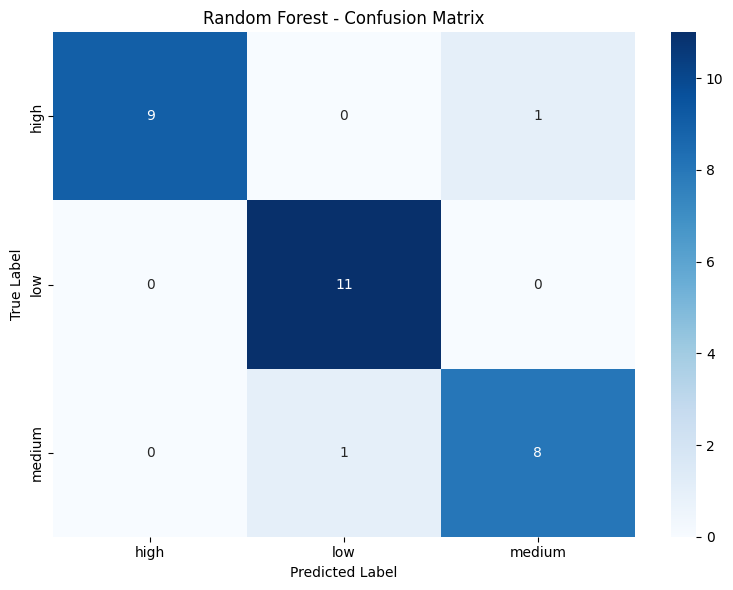


📊 Logistic Regression
------------------------------------------------------------
Test Accuracy: 0.9000 (90.00%)

Confusion Matrix:
[[ 9  0  1]
 [ 0 11  0]
 [ 0  2  7]]

Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.90      0.95        10
         low       0.85      1.00      0.92        11
      medium       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.91      0.89      0.90        30
weighted avg       0.91      0.90      0.90        30



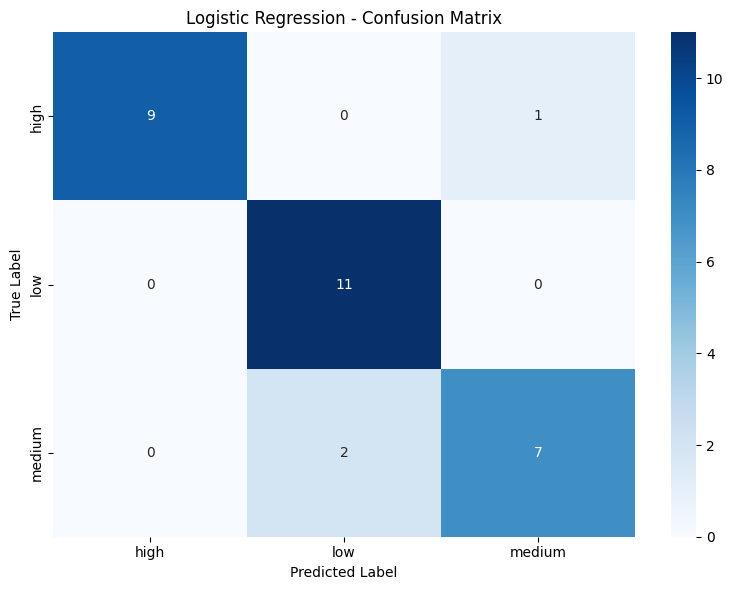


4. Model Comparison:
              Model  Train Acc  Test Acc  CV Mean   CV Std
                SVM   0.925000  0.966667 0.841667 0.040825
      Random Forest   1.000000  0.933333 0.816667 0.042492
Logistic Regression   0.891667  0.900000 0.866667 0.048591

🏆 Best Model: SVM


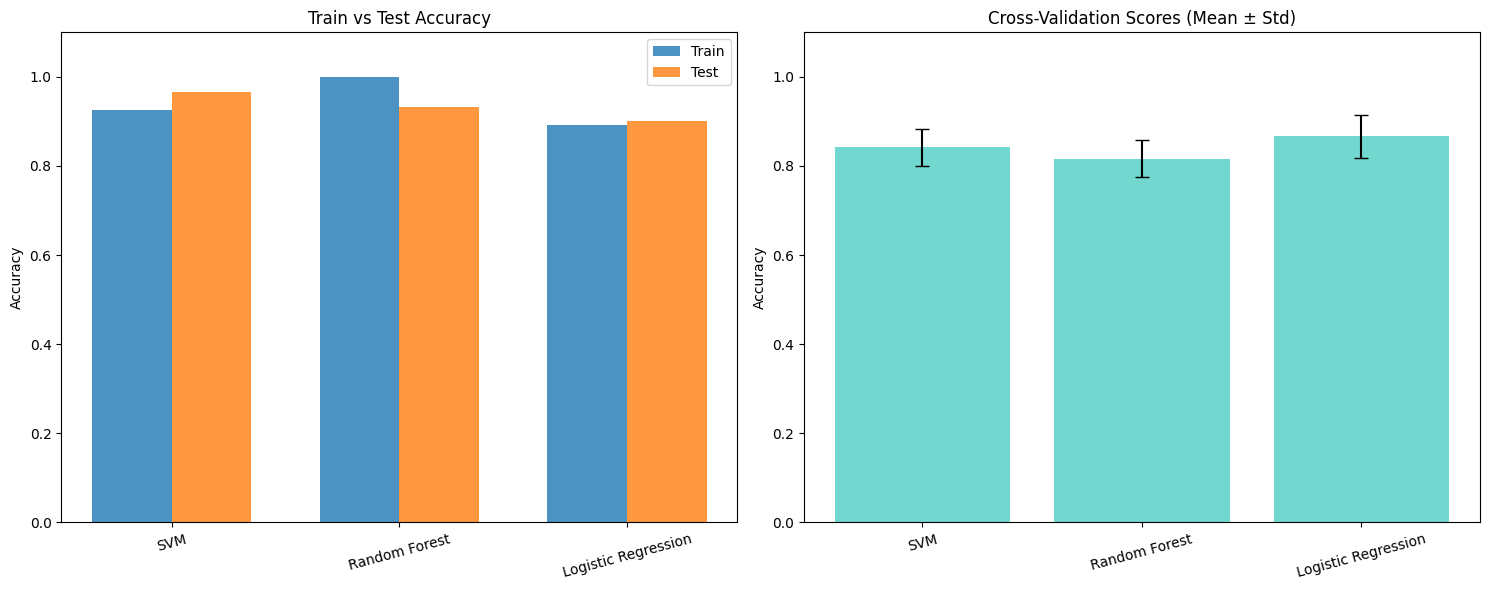


🔍 FINAL DIAGNOSTIC SUMMARY:
✓ Good performance - reasonable accuracy range

5. Saving the best model...
✓ Model saved: SVM
✓ Files: stress_detection_model.pkl, scaler.pkl, label_encoder.pkl

✅ DIAGNOSTIC PIPELINE COMPLETE!


In [17]:
# Stress Detection from Keystroke Dynamics - Diagnostic Pipeline
# Upload your CSV file when prompted in Colab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("STRESS DETECTION - DIAGNOSTIC VERSION")
print("=" * 60)

# ============================================================
# PART 2: DATA PREPROCESSING
# ============================================================

print("\n📁 PART 2: DATA PREPROCESSING")
print("-" * 60)

# Load dataset
print("\n1. Loading dataset...")
df = pd.read_csv('stress_keystroke_dataset.csv')
print(f"✓ Dataset loaded successfully!")
print(f"  Shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Display basic info
print("\n2. Dataset Overview:")
print(df.head(10))
print("\n   Column Names:", df.columns.tolist())

# 🔍 DIAGNOSTIC: Check for identifier columns
print("\n🔍 DIAGNOSTIC CHECK - Identifier Columns:")
print("-" * 60)
print("Columns that might cause data leakage:")
print("  - user_id: Unique identifier for each user")
print("  - session: Session number (1, 2, 3)")
print("\n⚠️  These should NOT be used as features!")

# Remove identifier columns
print("\n3. Removing identifier columns (user_id, session)...")
id_columns = ['user_id', 'session']
df_clean = df.drop(columns=id_columns)
print(f"✓ Removed: {id_columns}")
print(f"   Remaining columns: {df_clean.columns.tolist()}")

# Check data distribution
print("\n4. Stress Level Distribution:")
print(df_clean['stress_level'].value_counts().sort_index())
print("\nPercentages:")
print(df_clean['stress_level'].value_counts(normalize=True).sort_index() * 100)

# 🔍 DIAGNOSTIC: Visualize feature distributions by stress level
print("\n🔍 DIAGNOSTIC CHECK - Feature Patterns:")
print("-" * 60)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions by Stress Level', fontsize=16)

features_to_plot = ['typing_speed_wpm', 'error_rate_percent', 'backspace_count',
                    'hold_time_mean_ms', 'flight_time_mean_ms', 'pause_count']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 3, idx % 3]
    for stress in ['low', 'medium', 'high']:
        data = df_clean[df_clean['stress_level'] == stress][feature]
        ax.hist(data, alpha=0.5, label=stress, bins=20)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(feature)

plt.tight_layout()
plt.show()

# Clean data
print("\n5. Cleaning data...")
print(f"   Missing values:")
print(df_clean.isnull().sum())
df_clean = df_clean.dropna()
duplicates = df_clean.duplicated().sum()
print(f"   Duplicates: {duplicates}")
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()

# Separate features and target
print("\n6. Separating features and target...")
X = df_clean.drop(['stress_level'], axis=1)
y = df_clean['stress_level']
print(f"✓ Features: {X.columns.tolist()}")
print(f"✓ Features shape: {X.shape}")
print(f"✓ Target shape: {y.shape}")

# Encode stress labels
print("\n7. Encoding stress labels...")
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"✓ Encoding mapping:")
for i, label in enumerate(le.classes_):
    count = (y_encoded == i).sum()
    print(f"   {label} → {i} ({count} samples)")

# Normalize features
print("\n8. Normalizing features...")
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
print(f"✓ Features normalized using StandardScaler")

# ============================================================
# PART 3: MACHINE LEARNING MODEL
# ============================================================

print("\n\n🤖 PART 3: MACHINE LEARNING MODEL")
print("-" * 60)

# Train/Test split
print("\n1. Splitting data (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"✓ Train set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")
print(f"   Train distribution: {np.bincount(y_train)}")
print(f"   Test distribution: {np.bincount(y_test)}")

# Train models
print("\n2. Training models with Cross-Validation...")
models = {
    'SVM': SVC(kernel='rbf', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n   Training {name}...")

    # Cross-validation on training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Train on full training set
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred_test
    }

    print(f"   ✓ {name}:")
    print(f"      Train Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"      Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"      CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # 🔍 Check for overfitting
    if train_accuracy - test_accuracy > 0.1:
        print(f"      ⚠️  Possible overfitting detected!")

# 🔍 DIAGNOSTIC: Feature Importance (Random Forest)
print("\n🔍 DIAGNOSTIC CHECK - Feature Importance:")
print("-" * 60)
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Evaluate models
print("\n3. Detailed Model Evaluation:")
print("=" * 60)

for name in models.keys():
    test_accuracy = results[name]['test_accuracy']
    y_pred = results[name]['predictions']

    print(f"\n📊 {name}")
    print("-" * 60)
    print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Model comparison
print("\n4. Model Comparison:")
print("=" * 60)
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Acc': [results[name]['train_accuracy'] for name in results.keys()],
    'Test Acc': [results[name]['test_accuracy'] for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
}).sort_values('Test Acc', ascending=False)

print(comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Train vs Test accuracy
x = np.arange(len(comparison_df))
width = 0.35
ax1.bar(x - width/2, comparison_df['Train Acc'], width, label='Train', alpha=0.8)
ax1.bar(x + width/2, comparison_df['Test Acc'], width, label='Test', alpha=0.8)
ax1.set_ylabel('Accuracy')
ax1.set_title('Train vs Test Accuracy')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df['Model'], rotation=15)
ax1.legend()
ax1.set_ylim([0, 1.1])

# CV scores with error bars
ax2.bar(comparison_df['Model'], comparison_df['CV Mean'],
        yerr=comparison_df['CV Std'], capsize=5, alpha=0.8, color='#4ECDC4')
ax2.set_ylabel('Accuracy')
ax2.set_title('Cross-Validation Scores (Mean ± Std)')
ax2.set_xticklabels(comparison_df['Model'], rotation=15)
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

# 🔍 FINAL DIAGNOSTIC
print("\n🔍 FINAL DIAGNOSTIC SUMMARY:")
print("=" * 60)

avg_test_acc = comparison_df['Test Acc'].mean()
if avg_test_acc > 0.95:
    print("⚠️  SUSPICIOUSLY HIGH ACCURACY DETECTED!")
    print("\nPossible reasons:")
    print("1. Dataset might be too small or too clean")
    print("2. Stress patterns are very distinct in typing behavior")
    print("3. The features strongly correlate with stress levels")
    print("\nRecommendations:")
    print("- Collect more diverse data")
    print("- Test on completely new users")
    print("- Try adding noise/variability")
    print("- Check if lab conditions were too controlled")
elif avg_test_acc > 0.85:
    print("✓ Good performance - reasonable accuracy range")
else:
    print("⚠️  Lower accuracy - might need feature engineering")

# Save the final model
print("\n5. Saving the best model...")
best_model = results[best_model_name]['model']

with open('stress_detection_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print(f"✓ Model saved: {best_model_name}")
print(f"✓ Files: stress_detection_model.pkl, scaler.pkl, label_encoder.pkl")

print("\n" + "=" * 60)
print("✅ DIAGNOSTIC PIPELINE COMPLETE!")
print("=" * 60)